Goal: simulate consumer resource model and find parameter values


\begin{align*}
    \dot{x} &=  \bigg[\gamma_A r_A \frac{A}{K_A + A} + \gamma_I r_I \frac{I}{K_I + I} \bigg] \frac{C}{K_C + C}x\\
    \dot{A} &= -r_A \frac{A}{K_A + A} x\\
    \dot{I} &= \bigg[r_A \frac{A}{K_A + A} - r_I \frac{I}{K_I + I} \bigg]x\\
    \dot{\tilde{C}} &= - \frac{\tilde{C}}{K_C + \tilde{C}} x
\end{align*}

Here, $\tilde{C} = C/r_c$ is the normalized amount of limiting nutrient. Here, we then wish to fit rate and uptake parameters ($r$ and $\gamma$) as well as the initial biomass $x(0)$. We will use a sensitivity analysis to select $C(0)$ as well as each affinity, $K$.

In [3]:
import numpy as np

def RHS(x, A, I, C, gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C):
    dx = (gamma_A*r_A*A/(K_A + A) + gamma_I*r_I*I/(K_I + I))*x*C/(K_C + C)
    dA = -r_A*x*A/(K_A + A)
    dI = (r_A*A/(K_A + A) - r_I*I/(K_I + I))*x
    dC = - x*C/(K_C + C)
    return dx, dA, dI, dC

#use RK4
def timestep(x_n, A_n, I_n, C_n, gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C, dt):
    k_1 = RHS(x_n, A_n, I_n, C_n, gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C)
    k_2 = RHS(x_n + dt*k_1[0]/2, A_n + dt*k_1[1]/2, I_n + dt*k_1[2]/2, C_n + dt*k_1[3]/2, gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C)
    k_3 = RHS(x_n + dt*k_2[0]/2, A_n + dt*k_2[1]/2, I_n + dt*k_2[2]/2, C_n + dt*k_2[3]/2, gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C)
    k_4 = RHS(x_n + dt*k_3[0], A_n + dt*k_3[1], I_n + dt*k_3[2], C_n + dt*k_3[3], gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C)
    x_new = x_n + (dt/6)*(k_1[0] + 2*k_2[0] + 2*k_3[0] + k_4[0])
    A_new = A_n + (dt/6)*(k_1[1] + 2*k_2[1] + 2*k_3[1] + k_4[1])
    I_new = I_n + (dt/6)*(k_1[2] + 2*k_2[2] + 2*k_3[2] + k_4[2])
    C_new = C_n + (dt/6)*(k_1[3] + 2*k_2[3] + 2*k_3[3] + k_4[3])
    return x_new, A_new, I_new, C_new
    
def simulate(x_0, A_0, I_0, C_0, gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C, dt, T):
    N = int(T/dt)
    x = np.zeros(N); x[0] = x_0
    A = np.zeros(N); A[0] = A_0
    I = np.zeros(N); I[0] = I_0
    C = np.zeros(N); C[0] = C_0
    for i in range(N-1):
        new = timestep(x[i], A[i], I[i], C[i], gamma_A, gamma_I, r_A, r_I, K_A, K_I, K_C, dt)
        x[i + 1] = new[0]
        A[i + 1] = new[1]
        I[i + 1] = new[2]
        C[i + 1] = new[3]
        
    return x, A, I, C
    
    

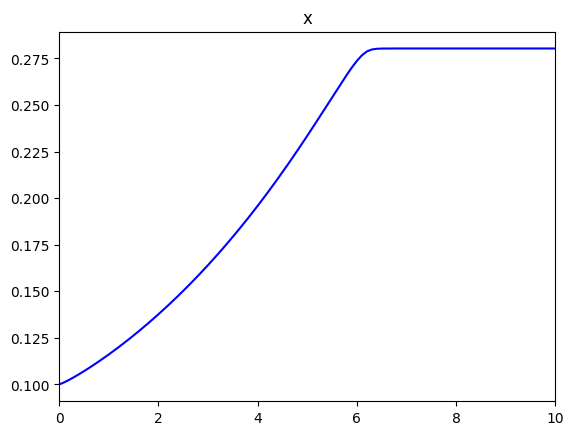

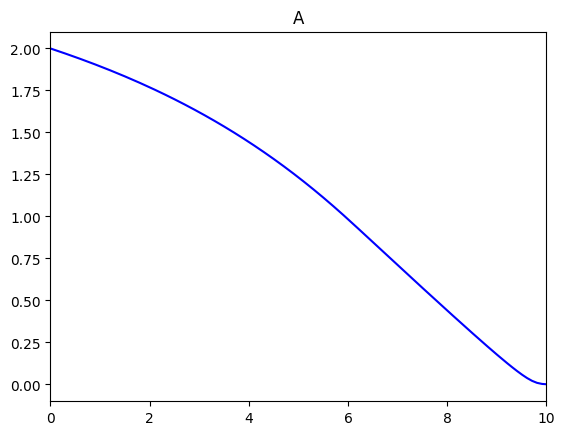

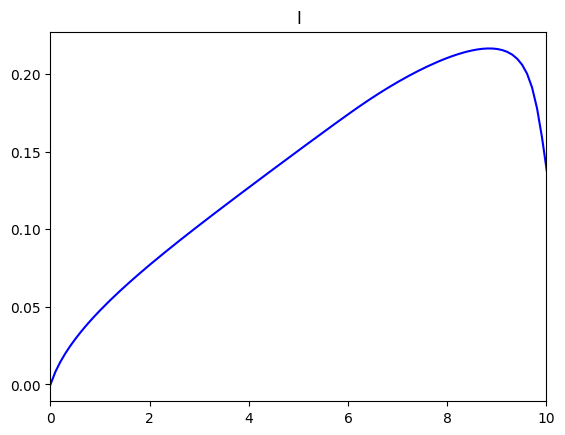

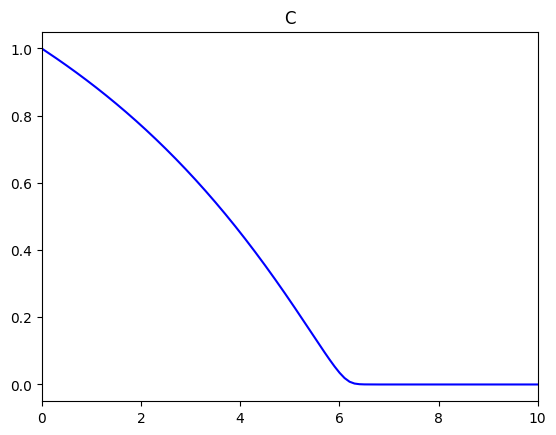

In [5]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
T = 100
x, A, I, C = simulate(0.1, 2, 0, 1, 0.1, 0.1, 1, 1, 0.02, 0.02, 0.02, dt, T)
t = np.linspace(0, T, int(T/dt))

plt.plot(t, x, color = 'blue')
plt.xlim(0,10)
plt.title('x')
plt.show()
plt.plot(t, A, color = 'blue')
plt.xlim(0,10)
plt.title('A')
plt.show()
plt.plot(t, I, color = 'blue')
plt.xlim(0,10)
plt.title('I')
plt.show()
plt.plot(t, C, color = 'blue')
plt.xlim(0,10)
plt.title('C')
plt.show()